# Question 1 aid: calculating probabilities

In [1]:
prob_dict = {
    'tttt': 80, 'tttf': 120, 'ttft': 80, 'ttff': 120,
    'tftt': 576, 'tftf': 144, 'tfft': 1344, 'tfff': 336,
    'fttt': 720, 'fttf': 1080, 'ftft': 720, 'ftff': 1080,
    'fftt': 864, 'fftf': 216, 'ffft': 2016, 'ffff': 504
}

def calculate_probability(lst):
    total = 0
    for key in prob_dict:
        match = True
        for i, char in enumerate(lst):
            if char == 1 and key[i] != 't':
                match = False
                break
        if match:
            total += prob_dict[key]
    return total

def combine_lists(lst1, lst2):
    combined_list = []
    for i in range(len(lst1)):
        combined_list.append(max(lst1[i], lst2[i]))
    return combined_list

def cond_prob(vars, given):
    # vars in form: list[4]:{0,1}
    # given in form: list[4]:{0,1}
    comb_list = combine_lists(vars, given)
    numerator = calculate_probability(comb_list)
    denominator = calculate_probability(given)
    return float(numerator / denominator)
       


def g(s):
    result = [0] * 4
    for c in s:
        if c == 'a': result[0] = 1
        elif c == 'b': result[1] = 1
        elif c == 'c': result[2] = 1
        elif c == 'd': result[3] = 1
    return result


In [2]:
print(cond_prob(g('c'), g('d')))
# ^ can also find e.g. P(C) as cond_prob(g('c'), g(''))

0.35


# Question 2 aid: finding gradient updates

In [25]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

y = [1,0]
x = [0.5, 1.0]
W1 = [[0.2, -0.3], [0.4, 0.1]]
W2 = [[0.7, 0.5], [-0.6, 0.2]]
z_2 = [1.5958, 2.1899]
a_2 = [-0.10675, 0.85875]
z_1 = [1.1225, 1.4875]
a_1 = [0.5, -0.05]

# q5
y = [1,0]
x = [0.5, 1.0]
W1 = [[0.2, -0.3], [0.4, 0.1]]
W2 = [[0.7, 0.5], [-0.6, 0.2]]
z_2 = [1, 2]
a_2 = [-0.1, 0.7]
z_1 = [1, 1]
a_1 = [0.5, -0.05]

def sig_deriv(a):
    return sigmoid(a) * sigmoid(1 - a)

def relu_deriv(a):
    if a <= 0: return 0
    return 1

def updateW2(q, r, act_deriv):
    print(W2[q][r])
    learn_rate = 0.1
    W2[q][r] = W2[q][r] - learn_rate * -2 * (y[r] - z_2[r]) * act_deriv(a_2[r]) * z_1[q]
    print(round(W2[q][r], 4))

def updateW1(p, q, act_deriv):
    print(W1[p][q])
    learn_rate = 0.1
    sum_1 = -2 * (y[0] - z_2[0]) * act_deriv(a_2[0]) * W2[q][0] * act_deriv(a_1[q]) * x[p]
    sum_2 = -2 * (y[1] - z_2[1]) * act_deriv(a_2[1]) * W2[q][0] * act_deriv(a_1[q]) * x[p]
    term = -2 * (y[q] - z_2[q]) * act_deriv(a_1[q]) * x[p]
    W1[p][q] = W1[p][q] - learn_rate * (sum_1 + sum_2 + term)
    print(round(W1[p][q], 4))


In [37]:
W1 = [[0.2, -0.3], [0.4, 0.1]]
W2 = [[0.7, 0.5], [-0.6, 0.2]]
updateW2(0,0, relu_deriv)

0.7
0.7


# Implementing Neural Network Training with Different Optimizers

### Objective:
The goal of this assignment is to implement a small neural network from scratch and train it using three different optimization algorithms: Stochastic Gradient Descent (SGD), SGD with Momentum, and SGD with AdaGrad. You will need to compare the performance of these optimizers.

## 1- Dataset

### Digits

This dataset, sourced from sklearn, consists of 1797 images, each sized 8x8 pixels. Every image, like the example shown below, depicts a handwritten digit. To utilize an 8x8 image, it must first be transformed into a feature vector of length 64.

The task with this dataset is to classify each digit, with a total of 10 classes.

The targets are one-hot encoded, i.e. each digit is transformed into a 10-dimensional vector with the element corresponding to the digit set to 1, and the other elements set to 0.

dataset's dimensions: (1797, 64)


<Figure size 640x480 with 0 Axes>

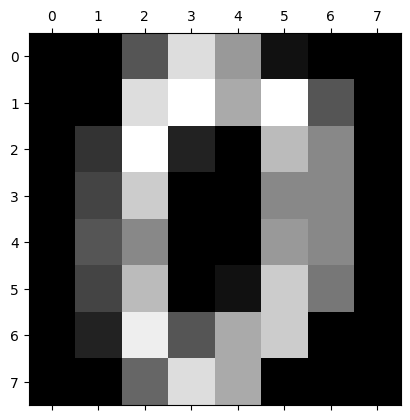

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

digits = load_digits()
print("dataset's dimensions:", digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()


In [6]:
# this function loads train and test sets from digits dataset
def load_data():
    digits = load_digits()
    X = digits.data
    y = digits.target

    enc = OneHotEncoder()
    y = enc.fit_transform(y.reshape(-1, 1)).toarray()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, y_train, X_test, y_test

## 2- Neural Network Architecture:
* Implement a simple feedforward neural network with one hidden layer.
* Use sigmoid activation for the hidden layer and softmax for the output layer.
* Feel free to add any necessary functions to the class below.
* See figure 2 in assignment pdf for a diagram

In [7]:
# Neural network forward and backward propagation
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

        self.dW1 = np.zeros((input_size, hidden_size))
        self.db1 = np.zeros((1, hidden_size))
        self.dW2 = np.zeros((hidden_size, output_size))
        self.db2 = np.zeros((1, output_size))

        # interim values
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

    def softmax(self, a):
        return np.exp(a) / np.sum(np.exp(a))
    
    def jacobian_softmax(self, z): # output given
        n = np.shape(z)[1]
        jac = np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                if i == j: jac[i,j] = z[0][i] * (1 - z[0][i])
                else: jac[i,j] = -z[0][i] * z[0][j]
        return jac

    def jacobian_sigmoid(self, a): # input given
        n = np.shape(a)[1]
        jac = np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                if i == j: jac[i,j] = (1 / (1 + np.exp(-a[0][i]))) * (1 / (1 + np.exp(-(1-a[0][i]))))
        return jac

    def forward(self, X):
        # Implement forward pass
        # You should store the intermediate values as fields to be used by the backward pass
        # The forward pass must work for all batch sizes
        batch_size = X.shape[0]
        self.a1_list = [None] * batch_size
        self.z1_list = [None] * batch_size
        self.a2_list = [None] * batch_size
        self.z2_list = [None] * batch_size

        for i in range(batch_size):
            x = X[i]
            self.a1_list[i] = x @ self.W1+ self.b1
            self.z1_list[i] = 1 / (1 + np.exp(-self.a1_list[i]))
            self.a2_list[i] = self.z1_list[i] @ self.W2 + self.b2
            self.z2_list[i] = self.softmax(self.a2_list[i])
        
        return self.z2_list
        # X: the x values, batched along dimension zero
        # return: z2

        raise NotImplementedError()

    def backward(self, X, y):
        # Implement backward pass, assuming the MSE loss
        # Use the intermediate values calculated from the forward pass,
        # and store the gradients in fields
        # The backward pass only need to work for batch size 1
        batch_size = X.shape[0]
        dW1_acc = np.zeros((self.input_size, self.hidden_size))
        db1_acc = np.zeros((1, self.hidden_size))
        dW2_acc = np.zeros((self.hidden_size, self.output_size))
        db2_acc = np.zeros((1, self.output_size))
        for i in range(batch_size):
            dE_over_dz = 2 / len(y[i]) * (self.z2_list[i] - y[i])
            deltas = [None] * 2
            deltas[1] = dE_over_dz @ self.jacobian_softmax(self.z2_list[i])
            dW2_acc += np.outer(self.z1_list[i].T, deltas[1])
            db2_acc += deltas[1]

            deltas[0] = (deltas[1] @ self.W2.T) @ self.jacobian_sigmoid(self.a1_list[i])
            dW1_acc += np.outer(X[i].T, deltas[0])
            db1_acc += deltas[0]
        
        # now compute mean
        self.db1 = db1_acc / batch_size
        self.db2 = db2_acc / batch_size
        self.dW1 = dW1_acc / batch_size
        self.dW2 = dW2_acc / batch_size

        return
        # X: the x values, batched along dimension zero
        # y: batched target values
        # return: None

        raise NotImplementedError()

    def get_params_and_grads(self):
        # Return parameters and corresponding gradients
        params = [self.W1, self.b1, self.W2, self.b2]
        grads = [self.dW1, self.db1, self.dW2, self.db2]
        return params, grads


## 3- Helper Functions
Implement the following helper functions (the `plot_all_results` function is already implemented):

* `mean_squared_error(predictions, targets)`: This function receives the predicted values from the network and the target values, calculates the mean squared loss, and returns the loss value. For clarification, you should take the mean of the squared error over the samples in the batch, and *not* over the outputs of each sample

* `compute_accuracy(predictions, targets)`: This function receives the predicted values and the target values, and returns the accuracy of the predictions. The predicted value is the index with the highest network output (z2) value.

* Feel free to add any other necessary helper functions here.


In [8]:
def mean_squared_error(predictions, targets):
    # Returns MSE loss
    n = len(targets)
    sse = 0
    length = len(targets[0])
    for i in range(n):
       for k in range(length):
          sse += ((targets[i][k] - predictions[i][0][k])**2)
    return sse / n
    raise NotImplementedError()

def compute_accuracy(predictions, targets):
    # Returns the accuracy of the predicted labels (between 0 and 1)
    count = 0
    length = len(predictions[0][0]) # number of output labels
    for i in range(len(predictions)):
      max_likelihood = None
      max_likelihood_idx = None
      correct_label_idx = None
      for k in range(length):
        if not max_likelihood or max_likelihood < predictions[i][0][k]:
          max_likelihood = predictions[i][0][k]
          max_likelihood_idx = k
        if targets[i][k] == 1: correct_label_idx = k
      if max_likelihood_idx == correct_label_idx: count += 1
    return count / len(predictions)
    raise NotImplementedError()

def plot_all_results(all_losses, all_accuracies, all_labels):
    if len(all_losses) != len(all_accuracies):
      raise ValueError("all_losses length must be equal to all_accuracies length")

    if len(all_losses) != len(all_labels):
      raise ValueError("all_labels length must be equal to all_losses length")

    epochs = len(all_losses[0])
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for i in range(len(all_losses)):
      plt.plot(range(1, epochs + 1), all_losses[i], label=all_labels[i])
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.title(f'Loss behaviours')

    plt.legend()

    plt.subplot(1, 2, 2)
    for i in range(len(all_losses)):
      plt.plot(range(1, epochs + 1), all_accuracies[i], label=all_labels[i])
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.title(f'Accuracy behaviours')

    plt.legend()
    plt.show()

# You may add helper functions here

## 4- Optimizer Implementations:
Implement the following optimization algorithms:

 * Stochastic Gradient Descent with minibatches (SGD)
 * SGD with Momentum
 * SGD with AdaGrad

Note that you must update each param in-place using `+=` or `-=` so that the weights of the network are updated.

In [9]:
# Optimizer implementations (SGD, SGD with Momentum, AdaGrad)

class SGD():
    def __init__(self, params, learning_rate):
        self.params = params
        self.lr = learning_rate

    def step(self, grads):
        # Perform one step of SGD
        # params = [W1, b1, W2, b2]
        # grads = [dW1, db1, dW2, db2]
        for i in range(len(grads)):
            self.params[i] -= self.lr * grads[i]
        return
        raise NotImplementedError()

class SGD_Momentum():
    def __init__(self, params, learning_rate, alpha):
        self.params = params
        self.lr = learning_rate
        self.alpha = alpha

        # You may need to add other fields here
        self.velocity = [0] * len(params)

    def step(self, grads):
        # Perform one step of SGD with momentum
        for i in range(len(grads)):
            self.velocity[i] = self.alpha * self.velocity[i] - self.lr * grads[i]
            self.params[i] += self.velocity[i]
        return
        raise NotImplementedError()

class SGD_AdaGrad():
    def __init__(self, params, learning_rate, delta):
        self.params = params
        self.lr = learning_rate
        self.delta = delta

        # You may need to add other fields here
        self.r = [0] * len(params)

    def step(self, grads):
        # Perform one step of SGD with adagrad
        for i in range(len(grads)):
            self.r[i] += np.multiply(grads[i], grads[i])
            update = np.multiply(-self.lr / (self.delta + np.sqrt(self.r[i])), grads[i])
            self.params[i] += update
        return
        raise NotImplementedError()


## 5- Training Loop:

The `train` function is used to train your neural network. It returns the training loss and accuracy after each epoch.


In [10]:
#batch generator
def gen_batches(data, labels, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i+batch_size], labels[i:i+batch_size]

# Training loop
def train(network, data, optimizer, epochs, batch_size):
    X_train, y_train, X_test, y_test = data
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
      random_indices = np.random.permutation(list(range(X_train.shape[0])))
      X_train = X_train[random_indices]
      y_train = y_train[random_indices]
      for x, y in gen_batches(X_train, y_train, batch_size):
        # Forward pass
        output = network.forward(x)

        # Backward pass
        network.backward(x, y)

        # Get parameters and gradients
        params, grads = network.get_params_and_grads()

        # Update parameters using the chosen optimizer
        optimizer.step(grads)

      # Compute loss and accuracy
      X_test = X_train
      y_test = y_train
      output = network.forward(X_test)
      train_loss = mean_squared_error(output, y_test)
      train_accuracy = compute_accuracy(output, y_test)

      test_losses.append(train_loss)
      test_accuracies.append(train_accuracy)

      if epoch % 20 == 19:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")

    return test_losses, test_accuracies

## 6- Main function
Use the following main function to train your neural network based on sgd, sgd-momentum, and AdaGrad. The following hyperparameters are used in training:

* batch_size = 128
* input_size = 64
* hidden_size = 20
* output_size = 10
* learning_rate = see LR on graph legend
* For SGD with momentum, alpha = 0.9
* For SGD with AdaGrad, delta = 10^-8
* epochs = 200

Compare the performance of the 5 different training passes, and discuss the impact of the learning rate

Training with SGD LR 0.5
Epoch 20/200, Loss: 0.8655, Accuracy: 0.5971
Epoch 40/200, Loss: 0.6939, Accuracy: 0.6340
Epoch 60/200, Loss: 0.4915, Accuracy: 0.7196
Epoch 80/200, Loss: 0.3477, Accuracy: 0.8483
Epoch 100/200, Loss: 0.2460, Accuracy: 0.8887
Epoch 120/200, Loss: 0.1709, Accuracy: 0.9638
Epoch 140/200, Loss: 0.1184, Accuracy: 0.9763
Epoch 160/200, Loss: 0.0917, Accuracy: 0.9791
Epoch 180/200, Loss: 0.0728, Accuracy: 0.9875
Epoch 200/200, Loss: 0.0628, Accuracy: 0.9854
Training with SGD LR 0.2
Epoch 20/200, Loss: 0.8963, Accuracy: 0.1204
Epoch 40/200, Loss: 0.8840, Accuracy: 0.4210
Epoch 60/200, Loss: 0.8544, Accuracy: 0.4621
Epoch 80/200, Loss: 0.8005, Accuracy: 0.4906
Epoch 100/200, Loss: 0.7189, Accuracy: 0.5644
Epoch 120/200, Loss: 0.6324, Accuracy: 0.6347
Epoch 140/200, Loss: 0.5530, Accuracy: 0.6834
Epoch 160/200, Loss: 0.4811, Accuracy: 0.7439
Epoch 180/200, Loss: 0.4123, Accuracy: 0.8058
Epoch 200/200, Loss: 0.3496, Accuracy: 0.8476
Training with SGD with Momentum LR 0.0

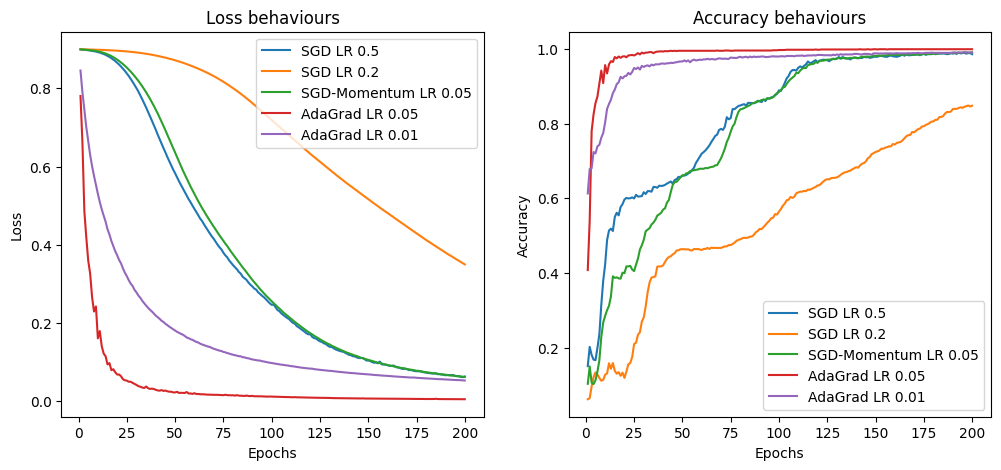

In [11]:
# Main function to run the experiments
def main():
    data = load_data()
    batch_size = 128
    input_size = 64  # For the digits dataset (8x8 images flattened)
    hidden_size = 20
    output_size = 10
    epochs = 200

    print("Training with SGD LR 0.5")
    network = NeuralNetwork(input_size, hidden_size, output_size)
    test_losses_sgd, test_accuracies_sgd = train(network, data, SGD(network.get_params_and_grads()[0], 0.5), epochs, batch_size)

    print("Training with SGD LR 0.2")
    network = NeuralNetwork(input_size, hidden_size, output_size)
    test_losses_sgd_b, test_accuracies_sgd_b = train(network, data, SGD(network.get_params_and_grads()[0], 0.2), epochs, batch_size)

    print("Training with SGD with Momentum LR 0.05")
    network = NeuralNetwork(input_size, hidden_size, output_size)
    test_losses_momentum, test_accuracies_momentum = train(network, data, SGD_Momentum(network.get_params_and_grads()[0], 0.05, 0.9), epochs, batch_size)

    print("Training with AdaGrad LR 0.05")
    network = NeuralNetwork(input_size, hidden_size, output_size)
    test_losses_adagrad, test_accuracies_adagrad = train(network, data, SGD_AdaGrad(network.get_params_and_grads()[0], 0.05, 1e-8), epochs, batch_size)

    print("Training with AdaGrad LR 0.01")
    network = NeuralNetwork(input_size, hidden_size, output_size)
    test_losses_adagrad_b, test_accuracies_adagrad_b = train(network, data, SGD_AdaGrad(network.get_params_and_grads()[0], 0.01, 1e-8), epochs, batch_size)

    # Compare train losses and train accuracies
    all_losses = [test_losses_sgd, test_losses_sgd_b, test_losses_momentum, test_losses_adagrad, test_losses_adagrad_b]
    all_accuracies = [test_accuracies_sgd, test_accuracies_sgd_b, test_accuracies_momentum, test_accuracies_adagrad, test_accuracies_adagrad_b]
    all_labels = ["SGD LR 0.5", "SGD LR 0.2", "SGD-Momentum LR 0.05", "AdaGrad LR 0.05", "AdaGrad LR 0.01"]
    plot_all_results(all_losses, all_accuracies, all_labels)

if __name__ == "__main__":
    main()

## 7. Increasing Layers

Instead of using 2-layer neural networks. We can increase number of layers to three and observe the loss again based on sgd. The newly added layer should adopt the same hidden size.

We are sticking to the same hyper-parameters as before.

* Plot the loss and accuracy.

* Discuss the impact of the increased layers in the pdf

In [12]:
# Please implement the 3-layer neural network and run the main function again to plot the curve.
# Neural network forward and backward propagation
class NeuralNetwork3:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W15 = np.random.randn(hidden_size, hidden_size) * 0.01
        self.b15 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

        self.dW1 = np.zeros((input_size, hidden_size))
        self.db1 = np.zeros((1, hidden_size))
        self.dW15 = np.zeros((hidden_size, hidden_size))
        self.db15 = np.zeros((1, hidden_size))
        self.dW2 = np.zeros((hidden_size, output_size))
        self.db2 = np.zeros((1, output_size))

        # interim values
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

    def softmax(self, a):
        return np.exp(a) / np.sum(np.exp(a))
    
    def jacobian_softmax(self, z): # output given
        n = np.shape(z)[1]
        jac = np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                if i == j: jac[i,j] = z[0][i] * (1 - z[0][i])
                else: jac[i,j] = -z[0][i] * z[0][j]
        return jac

    def jacobian_sigmoid(self, a): # input given
        n = np.shape(a)[1]
        jac = np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                if i == j: jac[i,j] = (1 / (1 + np.exp(-a[0][i]))) * (1 / (1 + np.exp(-(1-a[0][i]))))
        return jac

    def forward(self, X):
        # Implement forward pass
        # You should store the intermediate values as fields to be used by the backward pass
        # The forward pass must work for all batch sizes
        batch_size = X.shape[0]
        self.a1_list = [None] * batch_size
        self.z1_list = [None] * batch_size
        self.a15_list = [None] * batch_size
        self.z15_list = [None] * batch_size
        self.a2_list = [None] * batch_size
        self.z2_list = [None] * batch_size

        for i in range(batch_size):
            x = X[i]
            self.a1_list[i] = x @ self.W1+ self.b1
            self.z1_list[i] = 1 / (1 + np.exp(-self.a1_list[i]))
            
            self.a15_list[i] = self.z1_list[i] @ self.W15 + self.b15
            self.z15_list[i] = 1 / (1 + np.exp(-self.a15_list[i]))

            self.a2_list[i] = self.z15_list[i] @ self.W2 + self.b2
            self.z2_list[i] = self.softmax(self.a2_list[i])
        
        return self.z2_list
        # X: the x values, batched along dimension zero
        # return: z2

        raise NotImplementedError()

    def backward(self, X, y):
        # Implement backward pass, assuming the MSE loss
        # Use the intermediate values calculated from the forward pass,
        # and store the gradients in fields
        # The backward pass only need to work for batch size 1
        batch_size = X.shape[0]
        dW1_acc = np.zeros((self.input_size, self.hidden_size))
        db1_acc = np.zeros((1, self.hidden_size))
        dW15_acc = np.zeros((self.hidden_size, self.hidden_size))
        db15_acc = np.zeros((1, self.hidden_size))
        dW2_acc = np.zeros((self.hidden_size, self.output_size))
        db2_acc = np.zeros((1, self.output_size))

        for i in range(batch_size):
            dE_over_dz = 2 / len(y[i]) * (self.z2_list[i] - y[i])
            deltas = [None] * 3
            deltas[2] = dE_over_dz @ self.jacobian_softmax(self.z2_list[i])
            dW2_acc += np.outer(self.z15_list[i].T, deltas[2])
            db2_acc += deltas[2]
            
            deltas[1] = (deltas[2] @ self.W2.T) @ self.jacobian_sigmoid(self.a15_list[i])
            dW15_acc += np.outer(self.z1_list[i].T, deltas[1])
            db15_acc += deltas[1]
            
            deltas[0] = (deltas[1] @ self.W15.T) @ self.jacobian_sigmoid(self.a1_list[i])
            dW1_acc += np.outer(X[i].T, deltas[0])
            db1_acc += deltas[0]
        
        # now compute mean
        self.db1 = db1_acc / batch_size
        self.db2 = db2_acc / batch_size
        self.dW1 = dW1_acc / batch_size
        self.dW2 = dW2_acc / batch_size
        self.db15 = db15_acc / batch_size
        self.dW15 = dW15_acc / batch_size

        return
        # X: the x values, batched along dimension zero
        # y: batched target values
        # return: None

        raise NotImplementedError()

    def get_params_and_grads(self):
        # Return parameters and corresponding gradients
        params = [self.W1, self.b1, self.W15, self.b15, self.W2, self.b2]
        grads = [self.dW1, self.db1, self.dW15, self.db15, self.dW2, self.db2]
        return params, grads



Training with SGD LR 0.5
Epoch 20/200, Loss: 0.8999, Accuracy: 0.1072
Epoch 40/200, Loss: 0.8999, Accuracy: 0.1072
Epoch 60/200, Loss: 0.8998, Accuracy: 0.1072
Epoch 80/200, Loss: 0.8998, Accuracy: 0.1072
Epoch 100/200, Loss: 0.8999, Accuracy: 0.1072
Epoch 120/200, Loss: 0.8998, Accuracy: 0.1072
Epoch 140/200, Loss: 0.8998, Accuracy: 0.1072
Epoch 160/200, Loss: 0.8998, Accuracy: 0.1072
Epoch 180/200, Loss: 0.8998, Accuracy: 0.1072
Epoch 200/200, Loss: 0.8998, Accuracy: 0.1072
Training with SGD LR 0.2
Epoch 20/200, Loss: 0.8999, Accuracy: 0.1072
Epoch 40/200, Loss: 0.8999, Accuracy: 0.1072
Epoch 60/200, Loss: 0.8999, Accuracy: 0.1072
Epoch 80/200, Loss: 0.8999, Accuracy: 0.1072
Epoch 100/200, Loss: 0.8999, Accuracy: 0.1072
Epoch 120/200, Loss: 0.8999, Accuracy: 0.1072
Epoch 140/200, Loss: 0.8998, Accuracy: 0.1072
Epoch 160/200, Loss: 0.8998, Accuracy: 0.1072
Epoch 180/200, Loss: 0.8998, Accuracy: 0.1072
Epoch 200/200, Loss: 0.8998, Accuracy: 0.1072
Training with SGD with Momentum LR 0.0

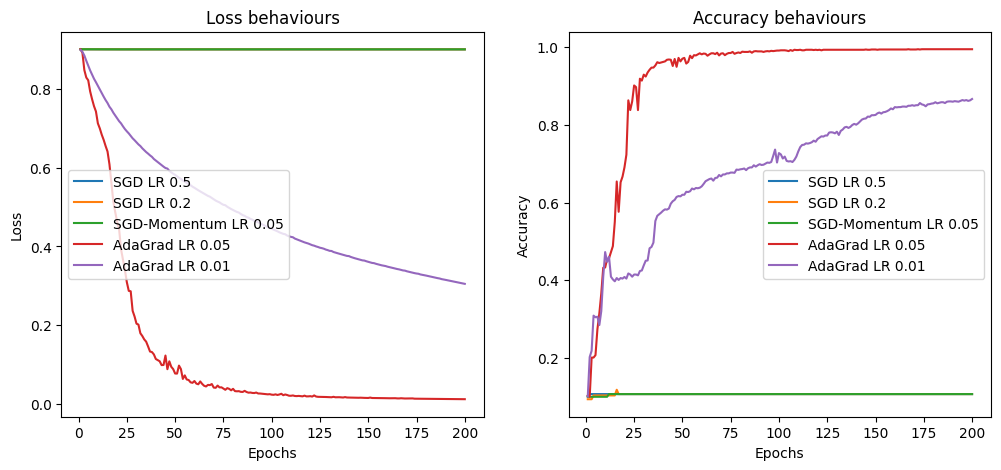

In [13]:
# Main function to run the experiments
def main():
    data = load_data()
    batch_size = 128
    input_size = 64  # For the digits dataset (8x8 images flattened)
    hidden_size = 20
    output_size = 10
    epochs = 200

    print("Training with SGD LR 0.5")
    network = NeuralNetwork3(input_size, hidden_size, output_size)
    test_losses_sgd, test_accuracies_sgd = train(network, data, SGD(network.get_params_and_grads()[0], 0.5), epochs, batch_size)

    print("Training with SGD LR 0.2")
    network = NeuralNetwork3(input_size, hidden_size, output_size)
    test_losses_sgd_b, test_accuracies_sgd_b = train(network, data, SGD(network.get_params_and_grads()[0], 0.2), epochs, batch_size)

    print("Training with SGD with Momentum LR 0.05")
    network = NeuralNetwork3(input_size, hidden_size, output_size)
    test_losses_momentum, test_accuracies_momentum = train(network, data, SGD_Momentum(network.get_params_and_grads()[0], 0.05, 0.9), epochs, batch_size)

    print("Training with AdaGrad LR 0.05")
    network = NeuralNetwork3(input_size, hidden_size, output_size)
    test_losses_adagrad, test_accuracies_adagrad = train(network, data, SGD_AdaGrad(network.get_params_and_grads()[0], 0.05, 1e-8), epochs, batch_size)

    print("Training with AdaGrad LR 0.01")
    network = NeuralNetwork3(input_size, hidden_size, output_size)
    test_losses_adagrad_b, test_accuracies_adagrad_b = train(network, data, SGD_AdaGrad(network.get_params_and_grads()[0], 0.01, 1e-8), epochs, batch_size)

    # Compare train losses and train accuracies
    all_losses = [test_losses_sgd, test_losses_sgd_b, test_losses_momentum, test_losses_adagrad, test_losses_adagrad_b]
    all_accuracies = [test_accuracies_sgd, test_accuracies_sgd_b, test_accuracies_momentum, test_accuracies_adagrad, test_accuracies_adagrad_b]
    all_labels = ["SGD LR 0.5", "SGD LR 0.2", "SGD-Momentum LR 0.05", "AdaGrad LR 0.05", "AdaGrad LR 0.01"]
    plot_all_results(all_losses, all_accuracies, all_labels)

if __name__ == "__main__":
    main()